In [1]:
import platform

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline


In [2]:
df = pd.read_csv('data/sms_2022.csv', encoding='cp949')
# df = pd.read_csv('data/sms_2021.csv', encoding='cp949')
# df = pd.read_csv('data/sms_2020.csv', encoding='cp949')
df.tail(10)

,일자,sms내용
9181,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9182,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9183,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9184,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9185,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9186,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9187,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9188,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9189,202203,온라인사전투표5시까지httpsvvdbzbhRZ
9190,202203,온라인사전투표5시까지httpsvvdbzbhRZ


In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Okt

import pandas as pd
import time
import re

In [4]:
len(df)

9191

In [5]:
df['sms내용'][1000]

'광고MBC시사tv방영대선후급상승만원으로매달백wwwvolicekr무료거부FW'

In [6]:
type(df['sms내용'][1])

str

In [7]:
text = ''
for i in range(len(df)):
    text += str(df['sms내용'][i])

text

'광고내일부터전문가와함께하세요hangllRnjP열쇠무료거부광고공민정님㈜희망부채만원주만에정리bitlygASC무료거부광고나눌헤어오픈주년이벤트안내httpspfkakaocomxmBQMC무료수신거부광고스페쉬삼일절전상품오늘단하루bitlyoDlPXA무료거부인증번호를정확히입력해주세요모션키광고월이기회다빠른거래시시까지▼▼httpsvvdbzbhy무료거부광고월이기회다빠른거래시시까지▼▼httpsvvdbzbhy무료거부광고스포츠화ㄷ▶▶sP무료거부광고월이기회다빠른거래시시까지▼▼httpsvvdbzbhy무료거부홍남표입니다절대한독립만세함성을기억하며국민의봄을기다립니다무료거부인증번호카카오계정단계인증번호입니다유료전환없음무료추천주▽바로입장▽urlkrgncsxq입장코드더치트소명기간종료일전귀하에대한피해사례를즉시확인해주세요TheCheatcokr광고MBC생활경제방영만원한장으로매주백만원씩wwwkyziclkr무료거부광고A에셋코인리플지원금링크방문시증정httpsurlkrosu무료거부광고A에셋코인리플지원금링크방문시증정httpsurlkrosu무료거부광고A에셋코인리플지원금링크방문시증정httpsurlkrosu무료거부광고A에셋코인리플지원금링크방문시증정httpsurlkrosu무료거부광고무료국내해외급등주식urlkrsevpm키무료거부광고HJL아무것도모르던가정주부도천수익달성wagluzido무료거부광고A에셋코인리플지원금링크방문시증정httpsurlkrosu무료거부M광고A전략VlP초단타명만OK분원urlkrwelbf무료거부광고MBC생활경제방영만원한장으로매주백만원씩wwwdonasikr무료거부광고MBC생활경제방영만원한장으로월오백만원씩wwwkyziclkr무료거부광고MBC생활경제방영만원한장으로월오백만원씩wwwkyziclkr무료거부광고MBC생활경제방영만원한장으로월오백만원씩wwwdonasikr무료거부광고GMS㈜당일↑일일으로창출트레이더와bitlymkZIZ무료거부광고GMS㈜당일↑일일으로창출트레이더와bitlymkZIZ무료거부광고MBC생활경제방영만원한장으로월오백만원씩wwwkyziclkr무료거부광고A에셋코인리플지원금링크방문시증정httpsurlkrosu무료거

In [8]:
okt = Okt()

In [9]:
# 트위터 형태소 분석 후 명사만 추출
constitution_nouns = okt.nouns(text)
len(constitution_nouns)

68968

In [10]:
one_words = []
tow_words = []
etc_words = []

for noun in constitution_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(6291, 53393, 9284)

In [11]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(477, 3862, 1537)

In [12]:
for word in one_words:
    print(word, end='\t')

빗	손	살	턱	통	꿈	특	차	중	나	저	팬	수	온	칼	링	룻	관	쥬	곤	빼	내	좌	쭉	국	걸	붐	뼈	버	축	례	굿	핑	뇨	격	제	액	혁	덕	망	밤	항	넌	뇬	묵	급	속	및	토	요	곧	옥	인	곳	곱	파	산	껌	널	농	벳	쟝	문	림	리	았	하	입	유	번	낼	귀	매	훈	컴	기	롤	융	떡	응	식	딩	볼	존	처	패	럼	초	칭	임	용	꼭	팁	테	얘	주	터	잔	활	달	뜽	콘	짓	뚜	배	회	춤	증	라	앱	빛	켐	눈	뷰	끝	좀	바	쌈	디	억	칩	슬	락	방	판	절	홙	섭	엽	콜	준	포	꽃	류	뷔	덴	률	일	노	맛	드	몸	베	스	계	향	쟈	충	셀	업	종	민	탑	숲	뒤	얄	빵	릅	홈	확	등	페	찬	월	트	부	친	원	돈	천	딍	총	츄	영	욜	띠	혜	담	댕	레	를	칙	득	길	린	털	약	끈	잌	목	음	괜	택	색	발	헬	구	톡	팔	맨	쌔	션	함	쭌	남	옆	금	덤	팅	복	을	최	힘	찿	닉	템	행	김	칸	공	피	깃	권	쿨	메	익	르	감	렉	랭	썩	술	돌	마	거	조	셋	추	후	쏙	뜻	섬	옵	년	앞	컬	숙	헤	펑	태	홍	면	팸	분	멕	편	오	건	츠	세	불	점	모	틀	물	픽	윤	빚	잭	브	경	휘	잉	령	블	투	삶	별	굴	만	넷	셔	쳣	프	팀	전	빅	꼐	율	솔	탠	직	컵	텔	콩	호	철	뽈	접	샵	앤	봄	연	채	잎	쨋	명	햇	더	썸	젖	송	쿱	박	양	은	탁	새	그	합	풀	굽	데	현	쿠	핀	님	평	텍	갑	티	글	녘	루	의	뽀	흥	꼬	위	짐	뉴	꿘	닝	것	핫	법	질	러	층	횟	늘	날	못	슈	슴	네	첫	개	고	품	딸	꿀	창	때	두	객	또	찍	셧	효	장	곡	로	애	실	깨	댁	승	폰	꾼	쩍	사	시	책	무	작	퍼	타	큐	폭	광	황	반	키	릭	협	값	청	설	외	홉	표	게	화	범	카	잡	납	너	워	욱	룸	알	줄	정	집	롯	쿡	강	쪽	치	콤	엠	비	역	침	골	펜	려	보	겸	왜	렌	줌	몫	칠	환	습	램	육	뜰	료	듀	규	선	맥	자	셈	아	맘	답	안	뭐	징	재	쯤	밍	신	움	해	진	막	낮	코	즉	볻	여	땐	열	말	빨	단	팩	운	상	읍	생	

In [13]:
stop_words = []
stop_words.extend(one_words)
len(stop_words)

477

In [14]:
stop_words

['빗',
 '손',
 '살',
 '턱',
 '통',
 '꿈',
 '특',
 '차',
 '중',
 '나',
 '저',
 '팬',
 '수',
 '온',
 '칼',
 '링',
 '룻',
 '관',
 '쥬',
 '곤',
 '빼',
 '내',
 '좌',
 '쭉',
 '국',
 '걸',
 '붐',
 '뼈',
 '버',
 '축',
 '례',
 '굿',
 '핑',
 '뇨',
 '격',
 '제',
 '액',
 '혁',
 '덕',
 '망',
 '밤',
 '항',
 '넌',
 '뇬',
 '묵',
 '급',
 '속',
 '및',
 '토',
 '요',
 '곧',
 '옥',
 '인',
 '곳',
 '곱',
 '파',
 '산',
 '껌',
 '널',
 '농',
 '벳',
 '쟝',
 '문',
 '림',
 '리',
 '았',
 '하',
 '입',
 '유',
 '번',
 '낼',
 '귀',
 '매',
 '훈',
 '컴',
 '기',
 '롤',
 '융',
 '떡',
 '응',
 '식',
 '딩',
 '볼',
 '존',
 '처',
 '패',
 '럼',
 '초',
 '칭',
 '임',
 '용',
 '꼭',
 '팁',
 '테',
 '얘',
 '주',
 '터',
 '잔',
 '활',
 '달',
 '뜽',
 '콘',
 '짓',
 '뚜',
 '배',
 '회',
 '춤',
 '증',
 '라',
 '앱',
 '빛',
 '켐',
 '눈',
 '뷰',
 '끝',
 '좀',
 '바',
 '쌈',
 '디',
 '억',
 '칩',
 '슬',
 '락',
 '방',
 '판',
 '절',
 '홙',
 '섭',
 '엽',
 '콜',
 '준',
 '포',
 '꽃',
 '류',
 '뷔',
 '덴',
 '률',
 '일',
 '노',
 '맛',
 '드',
 '몸',
 '베',
 '스',
 '계',
 '향',
 '쟈',
 '충',
 '셀',
 '업',
 '종',
 '민',
 '탑',
 '숲',
 '뒤',
 '얄',
 '빵',
 '릅',
 '홈',
 '확',
 '등',
 '페',
 '찬',
 '월',
 '트',
 '부',
 '친'

In [15]:
# stop_words 빼기
constitution_nouns = [ word for word in constitution_nouns if word not in stop_words ]
len(constitution_nouns)

62677

In [16]:
constitution  = nltk.Text(constitution_nouns, name='광고')
type(constitution), len(constitution)

(nltk.text.Text, 62677)

In [17]:
# nltk패키지를 통해 konlpy에서 뽑은 명사들 상위22개 추출
data = constitution.vocab().most_common(22)
len(data)

22

In [18]:
data

[('무료', 6546),
 ('거부', 5632),
 ('광고', 5267),
 ('만원', 713),
 ('번호', 661),
 ('투표', 626),
 ('확인', 576),
 ('대선', 562),
 ('온라인', 539),
 ('사전투표', 537),
 ('여론조사', 528),
 ('정보', 523),
 ('코인', 481),
 ('인증', 394),
 ('종목', 382),
 ('코드', 348),
 ('윤석열', 344),
 ('내일', 342),
 ('추천', 274),
 ('그룹', 259),
 ('투자', 254),
 ('입장', 227)]

In [19]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

22

In [20]:
del dict_data['무료']
del dict_data['거부']
del dict_data['광고']
del dict_data['확인']
del dict_data['만원']

In [21]:
dict_data

{'번호': 661,
 '투표': 626,
 '대선': 562,
 '온라인': 539,
 '사전투표': 537,
 '여론조사': 528,
 '정보': 523,
 '코인': 481,
 '인증': 394,
 '종목': 382,
 '코드': 348,
 '윤석열': 344,
 '내일': 342,
 '추천': 274,
 '그룹': 259,
 '투자': 254,
 '입장': 227}

In [22]:
pd = pd.Series(dict_data)

In [23]:
pd.index

Index(['번호', '투표', '대선', '온라인', '사전투표', '여론조사', '정보', '코인', '인증', '종목', '코드',
       '윤석열', '내일', '추천', '그룹', '투자', '입장'],
      dtype='object')

In [24]:
pd.values

array([661, 626, 562, 539, 537, 528, 523, 481, 394, 382, 348, 344, 342,
       274, 259, 254, 227], dtype=int64)

In [25]:
pd_df = pd.to_frame()

In [26]:
plt.rcParams['figure.figsize'] = (12,8)

In [27]:
pd_df.rename(columns={0:'빈도수'},inplace = True)

In [28]:
pd_df.sort_values(by='빈도수',ascending=True,inplace = True)
pd_df

,빈도수
입장,227
투자,254
그룹,259
추천,274
내일,342
윤석열,344
코드,348
종목,382
인증,394
코인,481


Text(0.5, 1.0, '2022년 스팸문자')

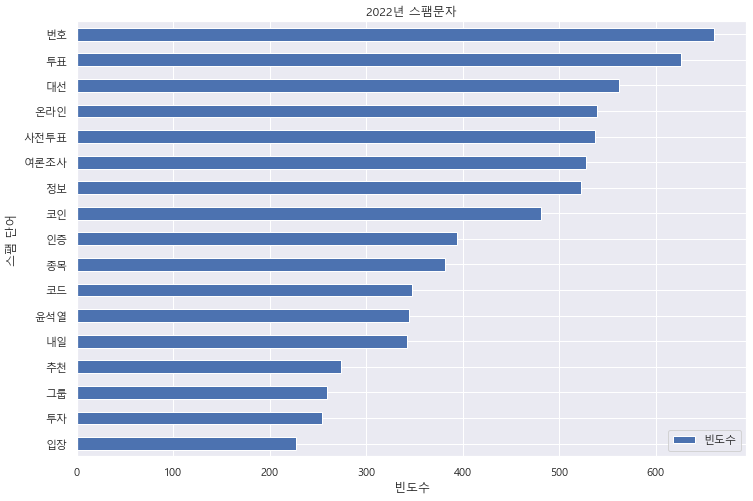

In [29]:
pd_df.plot(kind="barh",label='test')
plt.xlabel('빈도수')
plt.ylabel('스팸 단어')
plt.title('2022년 스팸문자')